In [14]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [15]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [16]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  Y


> Sorry, I didn't understand that.


> Refit the 3d model? [y/n]:  


> Sorry, I didn't understand that.


> Refit the 3d model? [y/n]:  N


> Sorry, I didn't understand that.


> Refit the 3d model? [y/n]:  N


> Sorry, I didn't understand that.


> Refit the 3d model? [y/n]:  n


In [17]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [18]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.14114082691884544, 0.5218809622789404],
 'diameter': 79.00720321723895,
 'confidence': 0.7042978405952454,
 'timestamp': -886388.077803,
 'sphere': {'center': [0.3575640560537949,
   0.3540339361293166,
   34.06653489875839],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [98.8324417921596, 98.86225848802384],
  'axes': [207.69515779481603, 207.69515779481603],
  'angle': 0.0},
 'circle_3d': {'center': [-5.7518581085330025,
   -0.3945814970804698,
   25.693092610904742],
  'normal': [-0.5878794218862089, -0.07203555364719641, -0.8057348598226832],
  'radius': 3.1434770869657553},
 'diameter_3d': 6.286954173931511,
 'ellipse': {'center': [27.099038768418325, 91.79885524244344],
  'axes': [58.89767103590711, 79.00720321723895],
  'angle': 6.434114653955106},
 'location': [27.099038768418325, 91.79885524244344],
 'model_confidence': 1.0,
 'theta': 1.6428943265710738,
 'phi': -2.20112545

Text(0.5, 0, 'Pupil timestamp (s)')

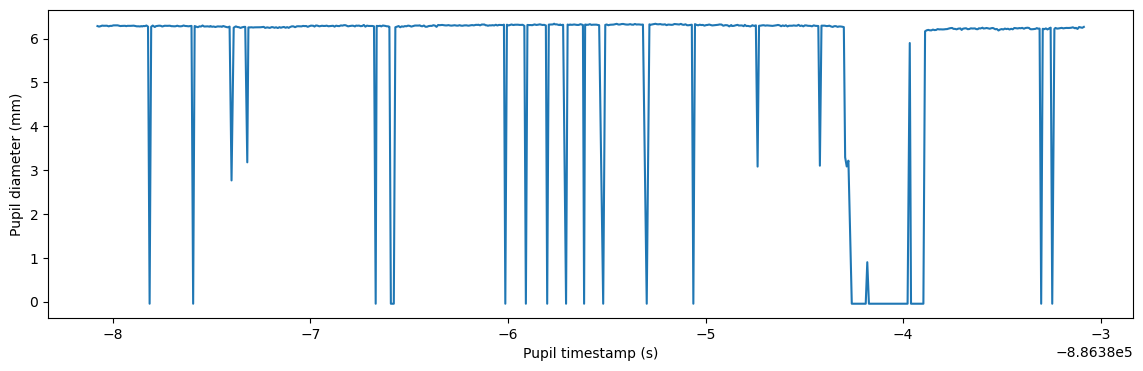

In [19]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')